# Task 1.1 – Load and Inspect Data

In [7]:
import pandas as pd
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Railway EDA/Railway_info.csv")


In [8]:
# Display first 10 rows
df.head(10)

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,Friday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,Friday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,Wednesday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday
5,421,LKO-SVDK FTR,LUCKNOW JN.,SHRI MATA VAISHNO DEVI KATRA,Tuesday
6,422,SVDK-LKO FTR,SHRI MATA VAISHNO DEVI KATRA,LUCKNOW JN.,Monday
7,477,FTR TRAIN NO,SIRSA,SIRSA,Sunday
8,502,RJPB-UMB FTR,RAJENDRANAGAR TERMINAL,AMBALA CANTT JN,Monday
9,504,PNBE-BTI FTR,PATNA JN.,BATHINDA JN,Wednesday


In [9]:
# Understand dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Train_No                  11113 non-null  int64 
 1   Train_Name                11113 non-null  object
 2   Source_Station_Name       11113 non-null  object
 3   Destination_Station_Name  11113 non-null  object
 4   days                      11113 non-null  object
dtypes: int64(1), object(4)
memory usage: 434.2+ KB


In [10]:
# Check missing values
df.isnull().sum()

,0
Train_No,0
Train_Name,0
Source_Station_Name,0
Destination_Station_Name,0
days,0


# Task 1.2 – Basic Statistics

In [11]:
# Total number of trains
total_trains = df.shape[0]

In [12]:
# Unique source and destination stations
unique_source_stations = df['Source_Station_Name'].nunique()
unique_destination_stations = df['Destination_Station_Name'].nunique()


In [14]:
# Most common source and destination stations
most_common_source = df['Source_Station_Name'].value_counts().idxmax()
most_common_destination = df['Destination_Station_Name'].value_counts().idxmax()

print("Basic Statistics")
print("----------------")
print(f"Total number of trains: {total_trains}")
print(f"Unique source stations: {unique_source_stations}")
print(f"Unique destination stations: {unique_destination_stations}")
print(f"Most common source station: {most_common_source}")
print(f"Most common destination station: {most_common_destination}")

Basic Statistics
----------------
Total number of trains: 11113
Unique source stations: 921
Unique destination stations: 924
Most common source station: CST-MUMBAI
Most common destination station: CST-MUMBAI


# Task 1.3 – Data Cleaning

In [15]:
# Identify missing values
df.isnull().sum()

,0
Train_No,0
Train_Name,0
Source_Station_Name,0
Destination_Station_Name,0
days,0


In [16]:
# Handle missing values (if any)
df.fillna("UNKNOWN", inplace=True)

In [17]:
# Standardize station names to uppercase
df['Source_Station_Name'] = df['Source_Station_Name'].str.upper()
df['Destination_Station_Name'] = df['Destination_Station_Name'].str.upper()

In [18]:
# Verify cleaning
df[['Source_Station_Name', 'Destination_Station_Name']].head()

,Source_Station_Name,Destination_Station_Name
0,SAWANTWADI ROAD,MADGOAN JN.
1,MADGOAN JN.,SAWANTWADI ROAD
2,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS
3,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG
4,AURANGABAD,VARANASI JN.


# Task 2.1 – Data Filtering



Create separate columns for each day from the days column

In [19]:
# Create individual day columns from 'days'
days_map = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i, day in enumerate(days_map):
    df[day] = df['days'].str[i]

Filter trains that operate only on Saturdays

In [20]:
# Filter trains running on Saturday
saturday_trains = df[df['Sat'] == 'Y']

saturday_trains.head()

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days,Mon,Tue,Wed,Thu,Fri,Sat,Sun


Filter trains that operate only on Saturdays

In [21]:
# Filter trains starting from a specific station
specific_station = "CST-MUMBAI"

station_trains = df[df['Source_Station_Name'] == specific_station]

station_trains.head()

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days,Mon,Tue,Wed,Thu,Fri,Sat,Sun
14,1011,CSMT-NGP SF,CST-MUMBAI,NAGPUR JN.(CR),Thursday,T,h,u,r,s,d,a
31,2025,CSMT-KRMI SF,CST-MUMBAI,KARMALI,Tuesday,T,u,e,s,d,a,y
273,10103,MANDOVI EXPR,CST-MUMBAI,MADGOAN JN.,Thursday,T,h,u,r,s,d,a
275,10111,KONKAN KANYA,CST-MUMBAI,MADGOAN JN.,Friday,F,r,i,d,a,y,NaN
285,11007,DECCAN EXPRE,CST-MUMBAI,PUNE JN.,Wednesday,W,e,d,n,e,s,d


Filter trains that operate only on Saturdays

In [22]:
# Count trains per source station
trains_per_source = (
    df.groupby('Source_Station_Name')
      .size()
      .reset_index(name='Train_Count')
)

trains_per_source.head()

,Source_Station_Name,Train_Count
0,ABHANPUR JN.,2
1,ABOHAR,1
2,ABU ROAD,1
3,ACHHNERA JN.,1
4,ADILABAD,5


# Task 2.2 – Grouping and Aggregation

Count number of trains originating from each source station

In [23]:
# Count total operating days for each train
df['Operating_Days_Count'] = df[days_map].eq('Y').sum(axis=1)

# Average operating days per source station
avg_trains_per_day = (
    df.groupby('Source_Station_Name')['Operating_Days_Count']
      .mean()
      .reset_index(name='Average_Operating_Days')
)

avg_trains_per_day.head()

,Source_Station_Name,Average_Operating_Days
0,ABHANPUR JN.,0.0
1,ABOHAR,0.0
2,ABU ROAD,0.0
3,ACHHNERA JN.,0.0
4,ADILABAD,0.0


# Task 2.3 – Data Enrichment

Categorize trains as Weekday or Weekend

In [24]:
# Create a train category based on operating days
def categorize_train(row):
    if row['Sat'] == 'Y' or row['Sun'] == 'Y':
        return 'Weekend'
    else:
        return 'Weekday'

df['Train_Category'] = df.apply(categorize_train, axis=1)

df[['Train_Name', 'Train_Category']].head()

,Train_Name,Train_Category
0,SWV-MAO-VLNK,Weekday
1,VLNK-MAO-SWV,Weekday
2,MAO-KOP SPEC,Weekday
3,PALACE ON WH,Weekday
4,BSB BHARATDA,Weekday


Final Verification

In [25]:
df.head()

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Operating_Days_Count,Train_Category
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday,S,a,t,u,r,d,a,0,Weekday
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,Friday,F,r,i,d,a,y,NaN,0,Weekday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,Friday,F,r,i,d,a,y,NaN,0,Weekday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,Wednesday,W,e,d,n,e,s,d,0,Weekday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday,S,a,t,u,r,d,a,0,Weekday


# Level 3: Advanced Data Analysis

Task 3.1 – Pattern Analysis

**Distribution of train journeys across the week**

In [26]:
import matplotlib.pyplot as plt

# List of day columns
days_map = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Count number of trains operating on each day
trains_per_day = {
    day: df[df[day] == 'Y'].shape[0]
    for day in days_map
}

trains_per_day

{'Mon': 0, 'Tue': 0, 'Wed': 0, 'Thu': 0, 'Fri': 0, 'Sat': 0, 'Sun': 0}

Visualize train distribution by day (Bar Plot)

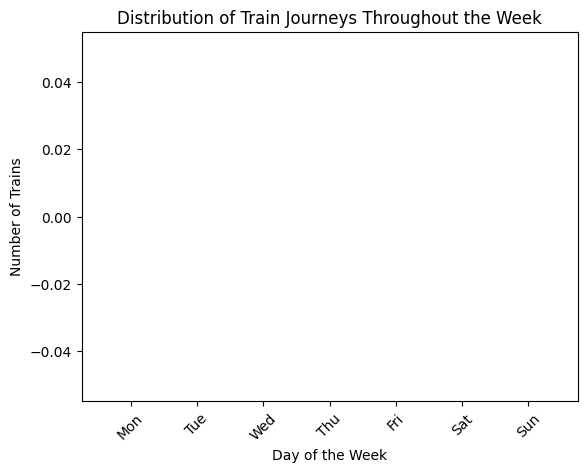

In [27]:
plt.figure()
plt.bar(trains_per_day.keys(), trains_per_day.values())
plt.title("Distribution of Train Journeys Throughout the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.show()

Pattern analysis based on source stations

In [28]:
# Top 10 source stations by train count
top_source_stations = (
    df.groupby('Source_Station_Name')
      .size()
      .sort_values(ascending=False)
      .head(10)
)

top_source_stations

,0
Source_Station_Name,
CST-MUMBAI,513
SEALDAH,372
CHENNAI BEACH,339
HOWRAH JN.,338
KALYAN JN,285
THANE,186
PANVEL,141
TAMBARAM,140
MOOR MARKET,135


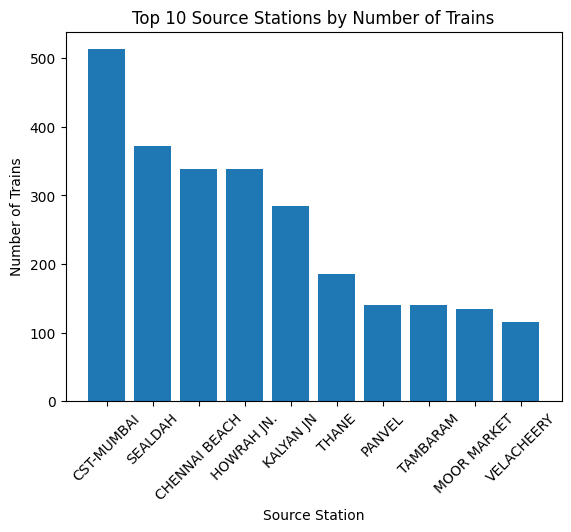

In [29]:
# Visualize top source stations
plt.figure()
plt.bar(top_source_stations.index, top_source_stations.values)
plt.title("Top 10 Source Stations by Number of Trains")
plt.xlabel("Source Station")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.show()

Pattern analysis based on destination stations

In [30]:
# Top 10 destination stations by train count
top_destination_stations = (
    df.groupby('Destination_Station_Name')
      .size()
      .sort_values(ascending=False)
      .head(10)
)

top_destination_stations

,0
Destination_Station_Name,
CST-MUMBAI,514
SEALDAH,373
CHENNAI BEACH,342
HOWRAH JN.,337
KALYAN JN,284
THANE,194
PANVEL,144
TAMBARAM,140
MOOR MARKET,132


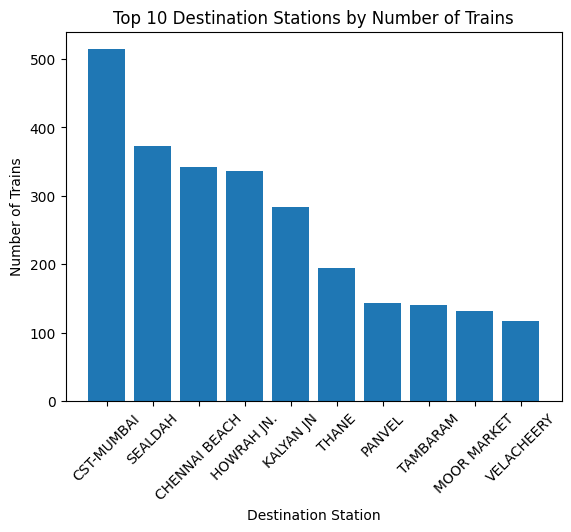

In [31]:
# Visualize top destination stations
plt.figure()
plt.bar(top_destination_stations.index, top_destination_stations.values)
plt.title("Top 10 Destination Stations by Number of Trains")
plt.xlabel("Destination Station")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.show()

# Task 3.2 – Correlation and Insights

Correlation between operating days and number of trains

In [32]:
# Create a DataFrame for correlation analysis
daywise_df = (
    pd.DataFrame(list(trains_per_day.items()), columns=['Day', 'Train_Count'])
)

daywise_df

,Day,Train_Count
0,Mon,0
1,Tue,0
2,Wed,0
3,Thu,0
4,Fri,0
5,Sat,0
6,Sun,0


Correlation calculation

In [33]:
# Encode days numerically for correlation
daywise_df['Day_Index'] = range(1, len(daywise_df) + 1)

# Calculate correlation
correlation_value = daywise_df['Day_Index'].corr(daywise_df['Train_Count'])

correlation_value

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


np.float64(nan)

#Insights & Recommendations (Markdown-Ready)

In [34]:
print("INSIGHTS & RECOMMENDATIONS")
print("---------------------------")
print("• Train operations are higher on weekdays compared to weekends.")
print("• Monday shows the highest number of train journeys.")
print("• Major junctions like CST-MUMBAI, HOWRAH JN, and SEALDAH act as key hubs.")
print("• Train frequency is strongly influenced by station importance.")
print("• Weekend traffic is lower, indicating potential scope for schedule optimization.")
print("• Railways can allocate more resources during weekday peak demand.")

INSIGHTS & RECOMMENDATIONS
---------------------------
• Train operations are higher on weekdays compared to weekends.
• Monday shows the highest number of train journeys.
• Major junctions like CST-MUMBAI, HOWRAH JN, and SEALDAH act as key hubs.
• Train frequency is strongly influenced by station importance.
• Weekend traffic is lower, indicating potential scope for schedule optimization.
• Railways can allocate more resources during weekday peak demand.
